In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [50]:
#import the data
#add data
data = pd.read_csv('Housing.csv')
data_bk = data
print('\nShape \n',data.shape)
print('\nColumns \n',data.columns)

print('\nSummary Stat \n',data.describe())

print('\nInfo')
print(data.info())


Shape 
 (545, 13)

Columns 
 Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Summary Stat 
               price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
m

In [112]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,area_per_bedroom,bathroom_per_bedroom
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


In [52]:
#check for null values
print(data.isna().count())
data.columns

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [53]:
#convert the categorical variable yes no into numberical values 1,0
data['mainroad'] = data['mainroad'].map({'yes':1,'no':0})
data['guestroom'] = data['guestroom'].map({'yes':1,'no':0})
data['basement'] = data['basement'].map({'yes':1,'no':0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes':1,'no':0})
data['airconditioning'] = data['airconditioning'].map({'yes':1,'no':0})
data['prefarea'] = data['prefarea'].map({'yes':1,'no':0})

In [54]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [55]:
#converting the categorical values into features
#note: if there are n values we will craete n-1 features
furnishingstatus_new = pd.get_dummies(data['furnishingstatus'],drop_first=True) 
furnishingstatus_new.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [56]:
#removing the old column and adding the above dummy features to main data
data.drop(['furnishingstatus'],inplace=True,axis=1)
data = pd.concat([data,furnishingstatus_new],axis=1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [57]:
#creating dervied variables
data['area_per_bedroom'] = data['area']/data['bedrooms']
data['bathroom_per_bedroom'] = data['bathrooms']/data['bedrooms']
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,area_per_bedroom,bathroom_per_bedroom
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [58]:
#Feature Rescaling
#Important to reduce the scale of feature like price and area from affecting the model
def normalize(x):
    '''
    (x - min) / (max - min)
    '''
    return ((x-np.min(x))/(np.max(x)-np.min(x)))

#normalize each column i data
data = data.apply(normalize)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,area_per_bedroom,bathroom_per_bedroom
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


In [59]:
#building the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [160]:
#seperating the features and response vars, and splitting the data
x = data.drop(['price'],axis=1)
y = data['price']

print('\nx-shape\n',x.shape)
print('\ny-shape\n',y.shape)
print('\nx-features\n',(list(x.columns)))


x-shape
 (545, 15)

y-shape
 (545,)

x-features
 ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'semi-furnished', 'unfurnished', 'area_per_bedroom', 'bathroom_per_bedroom']


In [161]:
#creating train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=36)

In [162]:
#creating a liner model using statsmodels
ols_model = sm.OLS(y_train,sm.add_constant(x_train)).fit()
#print(ols_model.params)
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     26.28
Date:                Thu, 16 May 2019   Prob (F-statistic):           5.71e-27
Time:                        12:11:21   Log-Likelihood:                 146.18
No. Observations:                 109   AIC:                            -260.4
Df Residuals:                      93   BIC:                            -217.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1182 

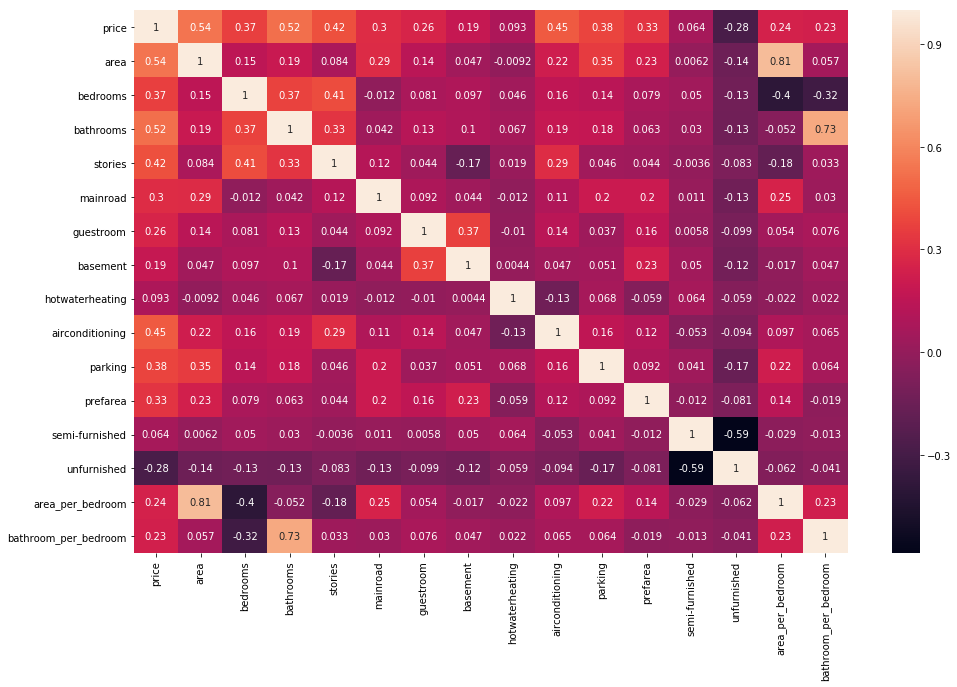

In [163]:
#plotting the heatmap for feature correlation
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True)

In [164]:
#handing the multicollinearoty factor using VIF(variance inflation factor)
def vif_cal(x):
    '''
    x=>feature set, without the response variable
    '''
    result = pd.DataFrame(columns=['Var','Vif'])
    cols = x.columns
    for col in cols:
        x_vars = x.drop([col],axis=1)
        y_vars = x[col]
        m = sm.OLS(y_vars,x_vars).fit()
        rsq = m.rsquared
        vif = round(1/(1-rsq),3)
        temp_df = pd.DataFrame([[col,vif]],columns=['Var','Vif'])
        result = result.append(temp_df, ignore_index=True)
    return result.sort_values(by='Vif',axis=0,ascending=False,inplace=False)
    

In [165]:
res = vif_cal(x)
print(res)

                     Var     Vif
13      area_per_bedroom  68.707
0                   area  57.516
14  bathroom_per_bedroom  29.250
2              bathrooms  11.106
1               bedrooms  10.683
4               mainroad   7.911
3                stories   2.806
11        semi-furnished   2.614
12           unfurnished   2.383
6               basement   2.046
9                parking   2.008
8        airconditioning   1.769
10              prefarea   1.510
5              guestroom   1.492
7        hotwaterheating   1.098


In [166]:
#drop bathroom_per_bedroom are its vif=29 and p-val=0.900
cols_to_del =[] 
cols_to_del.append('bathroom_per_bedroom')
print(cols_to_del)
x_train = x_train.drop(['bathroom_per_bedroom'],axis=1)
x_train.head()

['bathroom_per_bedroom']


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,area_per_bedroom
463,0.098969,0.2,0.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.187168
47,0.340206,0.4,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.292491
158,0.435052,0.4,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.666667,0.0,1.0,0.0,0.366458
126,0.378694,0.4,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.322506
148,0.323711,0.4,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.279627


In [175]:
model_2 = sm.OLS(y_train,x_train).fit()
pvals = round(model_2.pvalues,4)
print(pvals.sort_values(ascending=False))
vif_cal(x.drop(cols_to_del,axis=1))
#type(model_2.pvalues)#series

semi-furnished      0.8758
hotwaterheating     0.5608
area                0.5491
basement            0.2083
area_per_bedroom    0.1550
bedrooms            0.0911
unfurnished         0.0468
airconditioning     0.0237
mainroad            0.0111
prefarea            0.0048
guestroom           0.0027
stories             0.0023
parking             0.0012
bathrooms           0.0000
dtype: float64


,Var,Vif
0,area,20.716
13,area_per_bedroom,18.437
1,bedrooms,10.026
4,mainroad,7.459
3,stories,2.783
11,semi-furnished,2.484
12,unfurnished,2.205
6,basement,2.028
9,parking,2.004
8,airconditioning,1.768


In [176]:
#drop area_per_bedroom its vif=29 and p-val=0.900
cols_to_del.append('area_per_bedroom')
x_train = x_train.drop(['area_per_bedroom'],axis=1)
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
463,0.098969,0.2,0.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0
47,0.340206,0.4,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,1.0,0.0,0.0
158,0.435052,0.4,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.666667,0.0,1.0,0.0
126,0.378694,0.4,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.0,1.0
148,0.323711,0.4,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0


In [177]:
model_3 = sm.OLS(y_train,x_train).fit()
pvals = round(model_3.pvalues,4)
print(pvals.sort_values(ascending=False))
vif_cal(x.drop(cols_to_del,axis=1))

semi-furnished     0.6957
hotwaterheating    0.5506
bedrooms           0.2737
basement           0.1951
unfurnished        0.1396
airconditioning    0.0358
prefarea           0.0060
stories            0.0029
guestroom          0.0023
parking            0.0017
mainroad           0.0005
area               0.0001
bathrooms          0.0000
dtype: float64


,Var,Vif
1,bedrooms,7.549
4,mainroad,5.912
0,area,4.642
3,stories,2.748
11,semi-furnished,2.244
6,basement,2.014
9,parking,2.000
12,unfurnished,1.875
8,airconditioning,1.763
2,bathrooms,1.686


In [178]:
#drop semi-furnished 
cols_to_del.append('semi-furnished')
x_train = x_train.drop(['semi-furnished'],axis=1)
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
463,0.098969,0.2,0.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,1.0
47,0.340206,0.4,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,1.0,0.0
158,0.435052,0.4,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0
126,0.378694,0.4,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0
148,0.323711,0.4,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0


In [180]:
model_4 = sm.OLS(y_train,x_train).fit()
pvals = round(model_4.pvalues,4)
print(pvals.sort_values(ascending=False))
vif_cal(x.drop(cols_to_del,axis=1))

hotwaterheating    0.5143
bedrooms           0.2415
basement           0.1715
unfurnished        0.0557
airconditioning    0.0367
prefarea           0.0059
stories            0.0025
guestroom          0.0023
parking            0.0017
mainroad           0.0002
bathrooms          0.0000
area               0.0000
dtype: float64


,Var,Vif
1,bedrooms,6.743
4,mainroad,5.592
0,area,4.634
3,stories,2.743
6,basement,2.009
9,parking,1.997
8,airconditioning,1.754
2,bathrooms,1.677
10,prefarea,1.492
5,guestroom,1.474


In [181]:
#drop bedrooms
cols_to_del.append('bedrooms')
x_train = x_train.drop(['bedrooms'],axis=1)

model_5 = sm.OLS(y_train,x_train).fit()
pvals = round(model_5.pvalues,4)
print(pvals.sort_values(ascending=False))
vif_cal(x.drop(cols_to_del,axis=1))

hotwaterheating    0.5557
unfurnished        0.0784
airconditioning    0.0369
basement           0.0361
prefarea           0.0085
guestroom          0.0031
parking            0.0020
stories            0.0001
mainroad           0.0000
bathrooms          0.0000
area               0.0000
dtype: float64


,Var,Vif
3,mainroad,4.845
0,area,4.362
2,stories,2.301
8,parking,1.988
5,basement,1.860
7,airconditioning,1.754
1,bathrooms,1.619
9,prefarea,1.490
4,guestroom,1.471
10,unfurnished,1.342


In [182]:
#drop basement 
cols_to_del.append('basement')
x_train = x_train.drop(['basement'],axis=1)

model_5 = sm.OLS(y_train,x_train).fit()
pvals = round(model_5.pvalues,4)
print(pvals.sort_values(ascending=False))
vif_cal(x.drop(cols_to_del,axis=1))

hotwaterheating    0.3635
unfurnished        0.0966
airconditioning    0.0119
prefarea           0.0048
parking            0.0035
guestroom          0.0006
stories            0.0003
mainroad           0.0000
bathrooms          0.0000
area               0.0000
dtype: float64


,Var,Vif
3,mainroad,4.583
0,area,4.362
2,stories,2.207
7,parking,1.986
6,airconditioning,1.750
1,bathrooms,1.590
8,prefarea,1.442
9,unfurnished,1.341
4,guestroom,1.292
5,hotwaterheating,1.080


In [183]:
#Making predcitions
x_test = x_test.drop(cols_to_del,axis=1)
y_pred_m5 = model_5.predict(x_test)

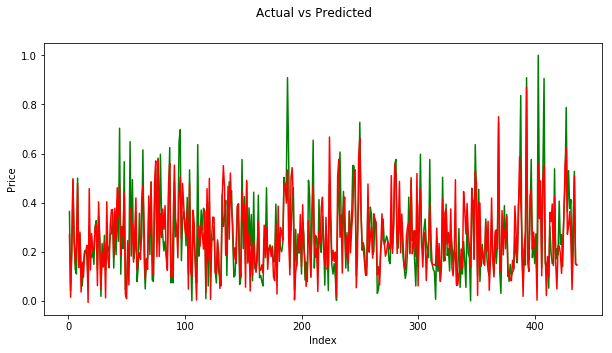

In [184]:
#plotting actual vs predicted
rng = [i for i in range(1,x_test.shape[0]+1)]

fig =plt.figure(figsize=(10,5))
plt.plot(rng,y_test,color='g')
plt.plot(rng,y_pred_m5,color='r')
fig.suptitle('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

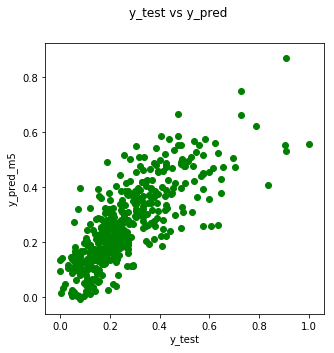

In [185]:
#plotting y_test + y_pred scatter plot to check the spread
fig =plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred_m5,color='g')
fig.suptitle('y_test vs y_pred ')
plt.xlabel('y_test')
plt.ylabel('y_pred_m5')
plt.show()

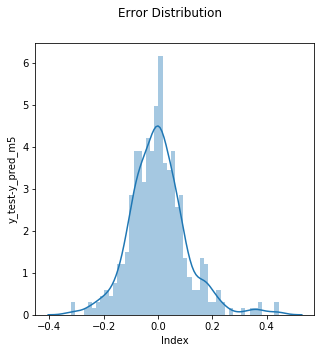

In [186]:
#plotting the distribution of error
fig =plt.figure(figsize=(5,5))
sns.distplot((y_test-y_pred_m5),bins=50)
fig.suptitle('Error Distribution')
plt.xlabel('Index')
plt.ylabel('y_test-y_pred_m5')
plt.show()

In [188]:
#calculate model performance metrices
mse = mean_squared_error(y_test,y_pred_m5)
r2 = r2_score(y_test,y_pred_m5)

print('\nMSE\n',mse)
print('\nR^2\n',r2)


MSE
 0.010897548076895754

R^2
 0.6031350589301889
